# EDA of logp.json

## Summary

1. There are 33% NA values for Temperature and PH. There are 2 rows with NA values.
2. There are some strange values (they were removed from dataset):
    * Extremely high temperatures, like 250000 Celsius
    * Extremely high logP value: 611
3. There are a lot of completely duplicated rows: 3382. (They were removed)
4. Only 1493 rows without 'strange' values are completely filled and different.
5. From 1493 rows only 366 molecules are unique. For other molecules we have different conditions.
6. The same logP values could be obtained with different temperature and ph value. Conditions have not big std for the same logP value.


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

LOG_P_FILE_PATH = "../data/logp.json"

In [2]:
# Read logP data

def read_logp_file():
    with open(LOG_P_FILE_PATH, "r") as logp_file:
        return [json.loads(line) for line in logp_file]

logp_data = pd.DataFrame(read_logp_file())
n = logp_data.shape[0]

In [3]:
logp_data.head()

,Temperature (C),pH,smiles,value
0,30,NaN,[Br][C]([Br])([Br])[Br],3.42
1,NaN,NaN,[F][C]([Cl])([Cl])[Cl],2.53
2,NaN,NaN,[F][C]([Cl])([Cl])[Cl],2.53
3,20,NaN,[F][C]([Cl])([Cl])[Cl],2.53
4,25,NaN,[O]=[N+]([O-])[C]([Cl])([Cl])[Cl],2.09


In [4]:
VALUE_COLUMN = "value"
TEMPERATURE_COLUMN = "Temperature (C)"
PH_COLUMN = "pH"
SMILES_COLUMN = "smiles"

In [5]:
logp_data[VALUE_COLUMN] = pd.to_numeric(logp_data[VALUE_COLUMN])
logp_data[TEMPERATURE_COLUMN] = pd.to_numeric(logp_data[TEMPERATURE_COLUMN])
logp_data[PH_COLUMN] = pd.to_numeric(logp_data[PH_COLUMN])
logp_data.head()

,Temperature (C),pH,smiles,value
0,30.0,NaN,[Br][C]([Br])([Br])[Br],3.42
1,NaN,NaN,[F][C]([Cl])([Cl])[Cl],2.53
2,NaN,NaN,[F][C]([Cl])([Cl])[Cl],2.53
3,20.0,NaN,[F][C]([Cl])([Cl])[Cl],2.53
4,25.0,NaN,[O]=[N+]([O-])[C]([Cl])([Cl])[Cl],2.09


In [6]:
# check NA values
num_of_na_value = logp_data[VALUE_COLUMN].isna().sum()
frac_of_na_value = int(100.0*(num_of_na_value / n))
print("# of NA values logP = " + str(num_of_na_value) + ", " + str(frac_of_na_value) + "%")
logp_data[logp_data[VALUE_COLUMN].isna()]

# of NA values logP = 2, 0%


,Temperature (C),pH,smiles,value
3218,37.0,NaN,[H][c]1[c]([H])[c]([S](=[O])(=[O])[N]([H])[H])...,NaN
4939,37.0,NaN,[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([...,NaN


In [7]:
# check NA temperature
num_of_na_temperature = logp_data[TEMPERATURE_COLUMN].isna().sum()
frac_of_na_temperature = int(100.0*(num_of_na_temperature / n))
print("# of NA values temperature = " + str(num_of_na_temperature) + ", " + str(frac_of_na_temperature) + "%")
temperature_df = logp_data[logp_data[TEMPERATURE_COLUMN].notna()][TEMPERATURE_COLUMN]
temperature_df.describe()

# of NA values temperature = 3250, 33%


count      6336.000000
mean         69.203180
std        3194.612013
min         -19.000000
25%          24.000000
50%          25.000000
75%          25.000000
max      253490.000000
Name: Temperature (C), dtype: float64

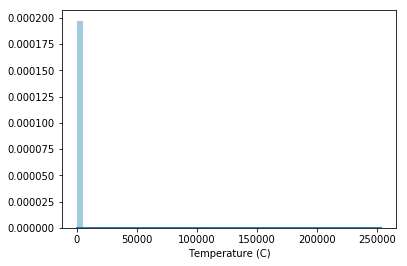

In [8]:
sns.distplot(temperature_df)

In [9]:
ranges = [0, 10000, 100000, 150000, 200000, 250000, 300000]
temperature_df.groupby(pd.cut(temperature_df, ranges)).count()

Temperature (C)
(0, 10000]          6333
(10000, 100000]        1
(100000, 150000]       0
(150000, 200000]       0
(200000, 250000]       0
(250000, 300000]       1
Name: Temperature (C), dtype: int64

In [10]:
print(temperature_df[temperature_df.isin(range(250000, 300000))])
print(temperature_df[temperature_df.isin(range(10000, 100000))])

1320    253490.0
Name: Temperature (C), dtype: float64
1856    20500.0
Name: Temperature (C), dtype: float64


count    6334.000000
mean       25.968006
std        11.066702
min       -19.000000
25%        24.000000
50%        25.000000
75%        25.000000
max       633.000000
Name: Temperature (C), dtype: float64


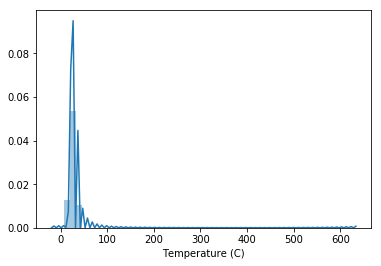

In [11]:
clipped_temperature_df = temperature_df.drop(index=1856).drop(index=1320)
print(clipped_temperature_df.describe())
sns.distplot(clipped_temperature_df)

In [12]:
ranges = [0, 100, 200, 300, 400, 500, 600]
clipped_temperature_df.groupby(pd.cut(clipped_temperature_df, ranges)).count()

Temperature (C)
(0, 100]      6329
(100, 200]       1
(200, 300]       1
(300, 400]       0
(400, 500]       1
(500, 600]       0
Name: Temperature (C), dtype: int64

In [13]:
# drop NA values
logp_data = logp_data[logp_data[VALUE_COLUMN].notna()]

In [14]:
logp_data.describe()

,Temperature (C),pH,value
count,6334.000000,1967.000000,9584.000000
mean,69.213349,5.877314,2.677759
std,3195.116361,2.313127,6.556673
min,-19.000000,0.100000,-4.200000
25%,24.000000,4.285000,1.200000
50%,25.000000,6.200000,2.470000
75%,25.000000,7.400000,3.990000
max,253490.000000,20.000000,611.000000


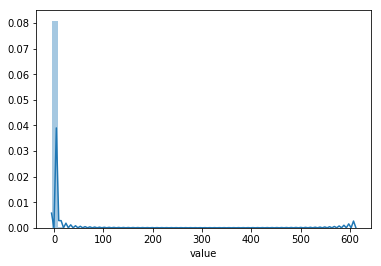

In [15]:
sns.distplot(logp_data[VALUE_COLUMN])

In [16]:
ranges = [0, 50, 100, 200, 300, 400, 500, 600, 700]
logp_data[VALUE_COLUMN].groupby(pd.cut(logp_data.value, ranges)).count()

value
(0, 50]       8748
(50, 100]        0
(100, 200]       0
(200, 300]       0
(300, 400]       0
(400, 500]       0
(500, 600]       0
(600, 700]       1
Name: value, dtype: int64

In [17]:
# What is this awkward molecule?
outlier = logp_data[logp_data[VALUE_COLUMN].isin(range(600, 700))]
outlier

,Temperature (C),pH,smiles,value
8875,25.0,NaN,[H][c]1[c]([H])[c]([H])[c]2[c]([H])[c]3[c]([c]...,611.0


In [18]:
clipped_logp_data = logp_data.drop(index=8875)
# remove strange temperatures
clipped_logp_data = clipped_logp_data.drop(index=1856).drop(index=1320)

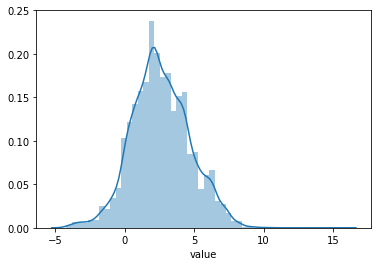

In [19]:
sns.distplot(clipped_logp_data[VALUE_COLUMN])

In [20]:
clipped_logp_data.describe()

,Temperature (C),pH,value
count,6331.000000,1967.000000,9581.000000
mean,25.964674,5.877314,2.614395
std,11.067580,2.313127,2.090777
min,-19.000000,0.100000,-4.200000
25%,24.000000,4.285000,1.200000
50%,25.000000,6.200000,2.470000
75%,25.000000,7.400000,3.990000
max,633.000000,20.000000,15.600000


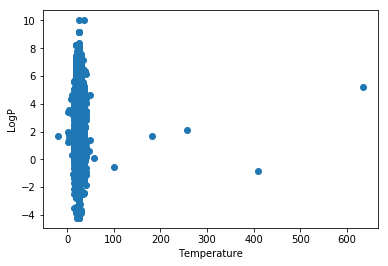

In [21]:
# Plot value vs temperature
temp_df = clipped_logp_data[clipped_logp_data[TEMPERATURE_COLUMN].notna()]
fig, ax = plt.subplots()
ax.scatter(temp_df[TEMPERATURE_COLUMN], temp_df[VALUE_COLUMN])
ax.set_xlabel("Temperature")
ax.set_ylabel("LogP")
plt.show()

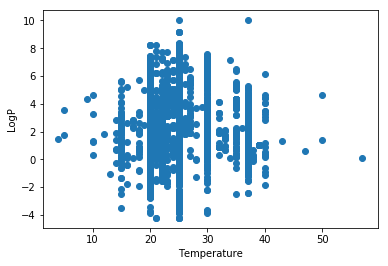

In [22]:
temp_df = temp_df[temp_df[TEMPERATURE_COLUMN].isin(range(0, 100))]
fig, ax = plt.subplots()
ax.scatter(temp_df[TEMPERATURE_COLUMN], temp_df[VALUE_COLUMN])
ax.set_xlabel("Temperature")
ax.set_ylabel("LogP")
plt.show()

In [24]:
num_of_na_ph = logp_data[PH_COLUMN].isna().sum()
frac_of_na_ph = int(100.0*(num_of_na_ph / n))
print("# of NA values pH = " + str(num_of_na_temperature) + ", " + str(frac_of_na_temperature) + "%")
ph_df = logp_data[logp_data[PH_COLUMN].notna()][PH_COLUMN].astype(float)
ph_df.describe()

# of NA values pH = 3250, 33%


count    1967.000000
mean        5.877314
std         2.313127
min         0.100000
25%         4.285000
50%         6.200000
75%         7.400000
max        20.000000
Name: pH, dtype: float64

In [25]:
clipped_ph_df = ph_df[ph_df.notna()]

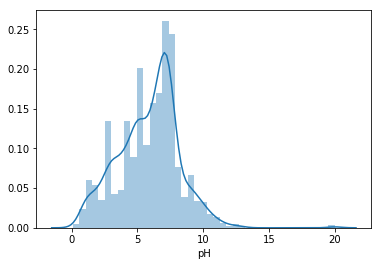

In [26]:
sns.distplot(clipped_ph_df)

In [27]:
logp_data[SMILES_COLUMN].isna().sum()

0

In [28]:
# let's look at final data
final_data = logp_data[logp_data[VALUE_COLUMN].notna()]
final_data = final_data.drop(index=8875)
final_data = final_data.drop(index=1856).drop(index=1320)
print(final_data.shape)
final_data.describe()

(9581, 4)


,Temperature (C),pH,value
count,6331.000000,1967.000000,9581.000000
mean,25.964674,5.877314,2.614395
std,11.067580,2.313127,2.090777
min,-19.000000,0.100000,-4.200000
25%,24.000000,4.285000,1.200000
50%,25.000000,6.200000,2.470000
75%,25.000000,7.400000,3.990000
max,633.000000,20.000000,15.600000


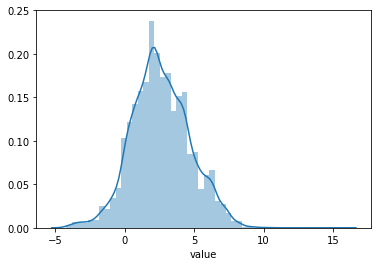

In [29]:
sns.distplot(final_data[VALUE_COLUMN])

In [30]:
final_data[SMILES_COLUMN].unique().size
# only 2647 out of 9581 molecules are uniques

2647

In [31]:
final_data.groupby(SMILES_COLUMN).count()

,Temperature (C),pH,value
smiles,,,
[Br][C]([Br])([Br])[Br],1,0,1
[Br][c]1[c]([Br])[c]([Br])[c]([Br])[c]([Br])[c]1[Br],1,0,2
[Br][c]1[c]([Br])[c]([Br])[c]([O][c]2[c]([Br])[c]([Br])[c]([Br])[c]([Br])[c]2[Br])[c]([Br])[c]1[Br],0,0,1
[Cl][C]([Cl])([Cl])[C]([Cl])([Cl])[Cl],3,0,5
[Cl][C]([Cl])([Cl])[Cl],5,0,11
[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4,0,10
[Cl][C]([Cl])=[C]([Cl])[Cl],9,0,13
[Cl][C]1([Cl])[C]2([Cl])[C]3([Cl])[C]4([Cl])[C]([Cl])([Cl])[C]5([Cl])[C]3([Cl])[C]1([Cl])[C]5([Cl])[C]24[Cl],2,0,7
[Cl][C]1=[C]([Cl])[C]([Cl])([C]2([Cl])[C]([Cl])=[C]([Cl])[C]([Cl])=[C]2[Cl])[C]([Cl])=[C]1[Cl],0,0,1


In [32]:
final_data[final_data[SMILES_COLUMN] == "[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl]"]

,Temperature (C),pH,smiles,value
421,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
422,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
423,25.0,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
424,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
425,20.0,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
426,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
427,25.0,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
428,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
429,25.0,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
430,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78


In [33]:
final_data.duplicated().sum()

3382

In [34]:
final_data = final_data.drop_duplicates()

In [35]:
final_data[final_data[SMILES_COLUMN] == "[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl]"]

,Temperature (C),pH,smiles,value
421,NaN,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
423,25.0,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78
425,20.0,NaN,[Cl][C]([Cl])=[C]([Cl])[C]([Cl])=[C]([Cl])[Cl],4.78


In [36]:
final_data = final_data.dropna()
#final_data.groupby([SMILES_COLUMN, VALUE_COLUMN, PH_COLUMN]).var()

In [37]:
final_data[final_data[SMILES_COLUMN] == "[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]1([H])[H])[c]1[o][c]([N+](=[O])[O-])[c]([H])[c]1[H]"]

,Temperature (C),pH,smiles,value
2919,37.0,7.2,[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]...,-0.47
2923,25.0,7.0,[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]...,-0.47
2925,22.0,1.2,[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]...,-0.47
2927,25.0,6.5,[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]...,-0.47
2929,37.0,5.0,[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]...,-0.47
2930,37.0,4.8,[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]...,-0.47


In [38]:
final_data.groupby([SMILES_COLUMN, VALUE_COLUMN, PH_COLUMN]).var().describe()

,Temperature (C)
count,63.000000
mean,40.699735
std,43.761433
min,0.125000
25%,4.500000
50%,32.000000
75%,67.500000
max,166.666667


In [39]:
temperature_var = final_data.groupby([SMILES_COLUMN, VALUE_COLUMN, PH_COLUMN]).std()
temperature_var

Temperature (C)
smiles                                             value pH                      
[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([H...  1.57 5.0000          5.656854
                                                         7.9000          5.656854
[H]/[C](=[C](/[H])[C]([H])([H])[N]1[C]([H])([H]...  5.77 4.5000               NaN
[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]1... -0.47 1.2000               NaN
                                                         4.8000               NaN
                                                         5.0000               NaN
                                                         6.5000               NaN
                                                         7.0000               NaN
                                                         7.2000               NaN
[H][C]#[C][C]1([O][H])[C]([H])([H])[C]([H])([H]...  4.53 7.5000               NaN
[H][C](=[C]1[c]2[c]([H])[c]([H])[c]([H])[c]([H]...  5.04 9.0600               NaN
                                                         9.4400               NaN
                                                         9.7800               NaN
[H][C]([H])([H])[C]([H])([H])[O][P](=[O])([O][C...  3.51 7.0000               NaN
[H][C]([H])=[C]([H])[C]([H])([H])[C]([C](=[O])[...  1.37 3.5000               NaN
[H][C]([H])=[C]([H])[C]([H])([H])[C]1([C]([H])(...  1.47 7.4000               NaN
[H][C]([H])=[C]([H])[C]([H])([H])[C]1([C]([H])(...  0.95 3.5000               NaN
[H][C]1=[C]([C]([C](=[O])[O][C]([H])([H])[C]([H...  2.25 3.5000               NaN
[H][C]1=[C]([C]2([C]([H])([H])[C]([H])([H])[H])...  1.77 4.7000               NaN
                                                         4.8514               NaN
[H][C]1=[C]([C]2([C]([H])([H])[H])[C](=[O])[N](...  1.98 3.5000               NaN
                                                         5.0000               NaN
[H][C]1=[C]([O][C]([H])([H])[H])[C]2([O][c]3[c]...  2.18 6.4000               NaN
[H][C]1=[C]([c]2[c]([H])[c]([H])[c]([S](=[O])(=...  1.71 1.2000               NaN
                                                         7.4000               NaN
[H][C]1=[C]2[C]([H])([H])[N]3[C]([H])([H])[C]([...  1.93 9.4300               NaN
[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(=... -0.24 6.5000         11.015141
[H][N]([C](=[O])[C]([H])([H])[H])[c]1[n][n][c](...  0.49 7.2000               NaN
[H][N]([C](=[O])[C]([H])([H])[H])[c]1[n][n][c](... -0.26 7.2000               NaN
                                                         7.4000               NaN
...                                                                           ...
[H][c]1[n][c]2[c]([H])[c]([Cl])[c]([H])[c]([H])...  4.63 12.4600              NaN
[H][c]1[n][c]2[c]([n][c]([H])[n]2[H])[c](=[O])[... -1.11 5.7000               NaN
[H][c]1[n][n](-[c]2[c]([H])[c]([H])[c]([H])[c](...  1.19 7.0000               NaN
[H][c]1[n][n](-[c]2[c]([H])[c]([H])[c]([H])[c](...  1.52 1.1700               NaN
[H][c]1[n][n][s][c]1[N]([H])[C](=[O])[N]([H])[c...  1.77 7.0000               NaN
[H][c]1[s][c]([C](=[O])[O][C]([H])([H])[H])[c](...  0.20 4.0000               NaN
                                                         5.0000               NaN
                                                         6.0000               NaN
                                                         7.0000               NaN
[H][c]1[s][c]([C]([H])([H])[C]([H])([H])[N]2[C]...  3.95 5.6600               NaN
                                                         6.1500               NaN
                                                         6.4500               NaN
                                                         6.6400               NaN
                                                         6.9700               NaN
                                                         7.4000               NaN
                                                         7.6000               NaN
                                                

In [40]:
temperature_var = temperature_var.dropna()
temperature_var

Temperature (C)
smiles                                             value pH                   
[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([H...  1.57 5.00         5.656854
                                                         7.90         5.656854
[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(=... -0.24 6.50        11.015141
[H][N]([H])[S](=[O])(=[O])[c]1[n][n]([C]([H])([...  0.13 7.40         2.121320
[H][N]([H])[c]1[n][c]([N]([H])[H])[n][c]([N]([H... -0.06 7.00         3.535534
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  1.65 5.00         5.656854
                                                         8.00         5.656854
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  0.97 5.00         5.656854
                                                         7.90         5.656854
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  1.73 7.90         5.656854
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  0.65 7.90         5.656854
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C@@](...  3.50 2.40        12.020815
                                                         3.00         3.535534
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([H...  4.15 3.00         5.000000
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([H...  2.39 3.00         3.535534
[H][O][C](=[O])[C]([H])([H])[C]([H])([O][H])[C]... -1.26 1.42         3.535534
[H][O][C](=[O])[C]([H])([H])[c]1[c]([C]([H])([H...  4.27 5.00        10.606602
                                                         6.00        10.606602
                                                         6.50         7.937254
                                                         7.00        10.606602
                                                         7.40         2.121320
[H][O][C](=[O])[C]([H])([H])[c]1[c]([H])[c]([H]...  4.40 2.00         3.535534
                                                         7.40        10.606602
[H][O][C](=[O])[C]([H])([c]1[c]([H])[c]([H])[c]...  3.99 1.20         2.121320
                                                         2.00         2.121320
                                                         3.00         2.121320
[H][O][C](=[O])[C]([H])([c]1[c]([H])[c]([H])[c]...  4.13 2.00         2.121320
                                                         3.00         2.121320
                                                         4.00         5.131601
                                                         7.40         2.121320
...                                                                        ...
[H][O][C](=[O])[C]([H])([c]1[c]([H])[c]([H])[c]...  3.24 5.00         2.121320
                                                         6.50         2.121320
[H][O][C](=[O])[c]1[c]([H])[c]([H])[c]([H])[c](...  1.87 3.00         1.414214
                                                         5.00         3.535534
[H][O][C](=[O])[c]1[c]([N]([H])[c]2[c]([H])[c](...  1.59 1.20         1.414214
                                                         2.00         2.121320
[H][O][C](=[O])[c]1[n][c]([Cl])[c]([Cl])[c]([N]...  0.30 2.80        12.909944
[H][O][C]([H])([H])[C]([H])([O][C]([H])([H])[n]... -1.66 7.00         1.414214
[H][c]1[c]([Cl])[c]([S](=[O])(=[O])[N]([H])[H])... -0.07 6.50        11.015141
[H][c]1[c]([F])[c](=[O])[n]([H])[c](=[O])[n]1[H]   -0.89 4.00         7.937254
[H][c]1[c]([H])[c]([C]([H])([H])[C]([H])([H])[N...  3.79 7.00         8.485281
[H][c]1[c]([H])[c]([H])[c]([C]2([C]([H])([H])[C...  1.84 5.00         8.736895
[H][c]1[c]([H])[c]([H])[c]([C]2([C]([H])([H])[C...  1.47 4.40         5.656854
                                                         7.40         5.656854
[H][c]1[c]([H])[c]([H])[c]2[c]([c]1[H])[C](=[O]...  0.33 6.40         4.949747
[H][c]1[c]([H])[c]([N]([H])[H])[c]([H])[c]([H])...  1.92 7.40        10.606602
                                                         9.10         2.121320
[H][c]1[c]([H])[c]([S](=[O])(=[O])[N]([H])[C](=...  2.34 6.35         7.424621
                                  

In [41]:
temperature_var.describe()

,Temperature (C)
count,63.000000
mean,5.440509
std,3.358517
min,0.353553
25%,2.121320
50%,5.656854
75%,8.211268
max,12.909944


In [42]:
final_data[final_data[SMILES_COLUMN] == "[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(=[O])[N]([H])[H])[c]([H])[c]2[S](=[O])(=[O])[N]1[H]"]

,Temperature (C),pH,smiles,value
1927,15.0,6.5,[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(...,-0.24
1928,25.0,6.5,[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(...,-0.24
1929,37.0,6.5,[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(...,-0.24


In [43]:
ph_var = final_data.groupby([SMILES_COLUMN, VALUE_COLUMN, TEMPERATURE_COLUMN]).std()
ph_var

pH
smiles                                             value Temperature (C)          
[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([H...  1.57 25.0             2.050610
                                                         33.0             2.050610
[H]/[C](=[C](/[H])[C]([H])([H])[N]1[C]([H])([H]...  5.77 25.0                  NaN
[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]1... -0.47 22.0                  NaN
                                                         25.0             0.353553
                                                         37.0             1.331666
[H][C]#[C][C]1([O][H])[C]([H])([H])[C]([H])([H]...  4.53 37.0                  NaN
[H][C](=[C]1[c]2[c]([H])[c]([H])[c]([H])[c]([H]...  5.04 24.0             0.360185
[H][C]([H])([H])[C]([H])([H])[O][P](=[O])([O][C...  3.51 25.0                  NaN
[H][C]([H])=[C]([H])[C]([H])([H])[C]([C](=[O])[...  1.37 23.0                  NaN
[H][C]([H])=[C]([H])[C]([H])([H])[C]1([C]([H])(...  1.47 25.0                  NaN
[H][C]([H])=[C]([H])[C]([H])([H])[C]1([C]([H])(...  0.95 23.0                  NaN
[H][C]1=[C]([C]([C](=[O])[O][C]([H])([H])[C]([H...  2.25 23.0                  NaN
[H][C]1=[C]([C]2([C]([H])([H])[C]([H])([H])[H])...  1.77 20.0                  NaN
                                                         25.0                  NaN
[H][C]1=[C]([C]2([C]([H])([H])[H])[C](=[O])[N](...  1.98 23.0                  NaN
                                                         25.0                  NaN
[H][C]1=[C]([O][C]([H])([H])[H])[C]2([O][c]3[c]...  2.18 37.0                  NaN
[H][C]1=[C]([c]2[c]([H])[c]([H])[c]([S](=[O])(=...  1.71 22.0                  NaN
                                                         25.0                  NaN
[H][C]1=[C]2[C]([H])([H])[N]3[C]([H])([H])[C]([...  1.93 20.0                  NaN
[H][C]1=[N][c]2[c]([H])[c]([Cl])[c]([S](=[O])(=... -0.24 15.0                  NaN
                                                         25.0                  NaN
                                                         37.0                  NaN
[H][N]([C](=[O])[C]([H])([H])[H])[c]1[n][n][c](...  0.49 35.0                  NaN
[H][N]([C](=[O])[C]([H])([H])[H])[c]1[n][n][c](... -0.26 25.0                  NaN
                                                         35.0                  NaN
[H][N]([H])[C](=[O])[N]([H])[C](=[O])[C]([C](=[...  1.99 23.0                  NaN
[H][N]([H])[C](=[O])[N]([H])[C](=[O])[C]([C](=[...  0.99 23.0                  NaN
[H][N]([H])[C](=[O])[N]([H])[C](=[O])[C]([C](=[...  1.45 23.0                  NaN
...                                                                            ...
[H][c]1[n][c]([N]([C]([H])([H])[c]2[c]([H])[c](...  3.27 37.0                  NaN
[H][c]1[n][c]([N]([H])[H])[n][c]([N]([H])[H])[c...  0.91 32.0             1.337391
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H...  0.82 37.0                  NaN
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H...  0.35 37.0             1.430629
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H...  0.14 25.0             1.221529
                                                         30.0                  NaN
                                                         35.0                  NaN
                                                         37.0             0.843878
                                                         40.0                  NaN
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H... -0.09 25.0             2.443551
                                                         37.0             0.839354
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H...  0.41 37.0             1.123342
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H...  0.05 25.0             0.551970
                                                         37.0             0.837644
[H][c]1[n][c]([O][C]([H])([H])[H])[c]([O][C]([H...  0.70 37.0             1.290994
[H][c]1[n][c]([O][c]2[c]([H])[c]([H])[c]([O][C]...  4.50 20.0                  NaN
[H][c]1[n][c]

In [45]:
ph_var = ph_var.dropna()
ph_var

pH
smiles                                             value Temperature (C)          
[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([H...  1.57 25.0             2.050610
                                                         33.0             2.050610
[H]/[C](=[N]\[N]1[C](=[O])[N]([H])[C](=[O])[C]1... -0.47 25.0             0.353553
                                                         37.0             1.331666
[H][C](=[C]1[c]2[c]([H])[c]([H])[c]([H])[c]([H]...  5.04 24.0             0.360185
[H][N]([c]1[n][c]([Cl])[n][c]([N]([H])[C]([H])(...  2.18 26.0             2.828427
[H][N]([c]1[n][c]([O][C]([H])([H])[H])[n][c]([N...  2.69 26.0             2.828427
[H][N]([c]1[n][c]([O][C]([H])([H])[H])[n][c]([N...  1.82 26.0             2.828427
[H][N]1[C](=[O])[C]([C]([H])([H])[C]([H])([H])[...  2.85 25.0             1.593738
[H][N]1[C](=[O])[N]([C]([H])([H])[H])[C](=[O])[...  1.15 25.0             2.545584
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  1.65 25.0             1.824829
                                                         33.0             2.121320
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  0.97 25.0             2.050610
                                                         33.0             2.050610
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  2.10 25.0             1.529270
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  2.07 25.0             0.070711
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  1.73 25.0             2.050610
[H][N]1[C](=[O])[N]([H])[C](=[O])[C]([C]([H])([...  0.65 25.0             0.332340
                                                         30.0             0.358260
                                                         33.0             2.121320
[H][O][C@@]([H])([C](=[O])[N]1[C]([H])([H])[S][...  3.56 25.0             1.496957
[H][O][C@]([H])([c]1[c]([H])[c]([H])[n][c]2[c](...  2.64 25.0             0.424264
[H][O][C](=[O])[C]([C]([H])([H])[H])([C]([H])([...  2.80 37.0             1.937871
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C@@](...  3.50 20.0             0.424264
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C](=[...  3.14 22.0             2.310805
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([H...  2.72 25.0             0.845616
[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([H...  4.20 20.0             1.290994
[H][O][C](=[O])[C]([H])([H])[C]1=[C]([C]([H])([...  3.42 22.0             2.687006
[H][O][C](=[O])[C]([H])([H])[c]1[c]([C]([H])([H...  4.27 22.0             2.206808
                                                         25.0             0.493288
...                                                                            ...
[H][c]1[c]([H])[c]([S](=[O])(=[O])[N]([H])[c]2[...  1.01 25.0             2.549438
                                                         37.0             1.162803
[H][c]1[c]([N]([H])[H])[n][c]([N]([H])[H])[c](/...  1.73 25.0             0.444175
[H][c]1[c]([N]([H])[S](=[O])(=[O])[c]2[c]([H])[...  0.89 25.0             2.921198
                                                         32.0             2.694533
                                                         37.0             2.474391
[H][c]1[c]([O][C]([H])([H])[H])[n][n][c]([N]([H...  0.37 37.0             0.926643
[H][c]1[c]([O][C]([H])([H])[H])[n][n][c]([N]([H...  0.32 37.0             0.832166
[H][c]1[c]([O][P](=[S])([O][C]([H])([H])[H])[O]...  4.20 30.0             2.899138
[H][c]1[n][c]([C]([H])([H])[S][C]([H])([H])[C](...  0.40 25.0             1.249000
[H][c]1[n][c]([C]([H])([H])[c]2[c]([H])[c]([H])...  3.00 37.0             1.058301
[H][c]1[n][c]([H])[c]([C]([H])([H])[N]([H])[c]2...  0.29 25.0             2.362469
[H][c]1[n][c]([H])[c]([H])[c]([C](=[O])[O][C]([...  0.83 25.0             2.370919
[H][c]1[n][c]([H])[n]([C]([H])([H])[H])[c]1[C](...  3.87 23.0             1.353242
[H][c]1[n][c]([N]([H])[H])[n][c]([N]([H])[H])[c...  0.91 32.0             1.337391
[H][c]1[n][c]([N]([H])[S](=[O])(=[O])[c]2[c]([H...  0.35 37.0             1.430629
[H][c]1[n][c]

In [47]:
final_data[final_data[SMILES_COLUMN] == "[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([H])[C]([H])([H])[H])[C](=[O])[N]([H])[C](=[O])[N]([H])[C]1=[O])[C]([H])([H])[C]([H])([H])[H]"]

,Temperature (C),pH,smiles,value
5246,25.0,5.0,[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([...,1.57
5251,25.0,7.9,[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([...,1.57
5254,33.0,5.0,[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([...,1.57
5255,33.0,7.9,[H]/[C](=[C](/[C]([H])([H])[H])[C]1([C]([H])([...,1.57


In [48]:
ph_var.describe()

,pH
count,176.000000
mean,1.717154
std,0.849025
min,0.070711
25%,1.073146
50%,1.602759
75%,2.222399
max,4.384062


In [49]:
final_data[SMILES_COLUMN].unique().size

366